#### ****Problema de Negócio****

A evasão de funcionários é um problema sério para muitas empresas. A ciência de dados pode ajudar a conter esse problema de diversas formas, como analisando dados de desempenho para identificar funcionários em risco de deixar a empresa ou usando análise preditiva para prever a probabilidade de evasão e tomar medidas preventivas. A análise de dados pode ser uma ferramenta poderosa para reter talentos e melhorar a produtividade.

##### Hipóteses que tentaremos responder
1) Existe alguma relação entre a idade do funcionário e sua probabilidade de evasão?
2) Funcionários da área de vendas têm maior probabilidade de evasão do que outros departamentos?
3) Funcionários que viajam com mais frequência têm maior probabilidade de evasão?
4) Qual é a influência do salário na probabilidade de evasão?
5) Existe alguma relação entre o nível de satisfação com o trabalho e a probabilidade de evasão?
6) Qual é a influência do tempo que um funcionário passou na empresa na probabilidade de evasão?
7) Funcionários que receberam uma promoção recentemente têm menor probabilidade de evasão?

#### **Importando Bibliotecas e Dados**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from skopt import gp_minimize

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 35)

In [97]:
ibm = pd.read_csv("IBM Hr Analytics.csv")

#### **Conhecendo os dados**

In [98]:
df_informations(ibm)

<H3 style='text-align:left;float:lfet;'>Information about the Dataset

<H5> Dataset has 1470 rows and 35 columns. From these, we have:

,Not Null,Null,Perce Null,Unique,Dtype
Age,1470,0,0.00%,43,int64
Attrition,1470,0,0.00%,2,object
BusinessTravel,1470,0,0.00%,3,object
DailyRate,1470,0,0.00%,886,int64
Department,1470,0,0.00%,3,object
DistanceFromHome,1470,0,0.00%,29,int64
Education,1470,0,0.00%,5,int64
EducationField,1470,0,0.00%,6,object
EmployeeCount,1470,0,0.00%,1,int64
EmployeeNumber,1470,0,0.00%,1470,int64


<H3 style='text-align:left;float:lfet;'>About Dtypes we have:

,Dtype,Perce
int64,26,74.00%
object,9,26.00%


In [99]:
ibm.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Age,1470.0,36.923810,9.135373,18.0,19.00,26.0,30.00,36.0,43.00,50.0,58.31,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,117.00,242.8,465.00,802.0,1157.00,1356.0,1485.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,1.00,1.0,2.00,7.0,14.00,23.0,29.00,29.0
Education,1470.0,2.912925,1.024165,1.0,1.00,1.0,2.00,3.0,4.00,4.0,5.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,19.69,198.9,491.25,1020.5,1555.75,1857.1,2046.62,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,1.00,1.0,2.00,3.0,4.00,4.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,30.00,38.0,48.00,66.0,83.75,94.0,100.00,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,1.00,2.0,2.00,3.0,3.00,3.0,4.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,1.0,1.00,2.0,3.00,4.0,5.00,5.0


##### **Conclusão conhecendo os dados:**
1. O dataset do IBM possui 1470 linhas e 35 colunas.
2. O dataset não possui valores nulos
3. Os dados possuem dois formatos int64 e object
4. A coluna EmployeeNumber apresenta somente valores únicos, devido a isso não será útil na nossa modelagem.
5. Os dados parecem não apresentar outlier.

#### **Análise Gráfica**

In [100]:
# Separando os dados categóricos dos numéricos. 
col_categ = list(ibm.select_dtypes("object").columns)
col_num = list(ibm.select_dtypes("int64").columns)

col_categ.remove('Attrition')

##### **Distribuição das variáveis categóricas**

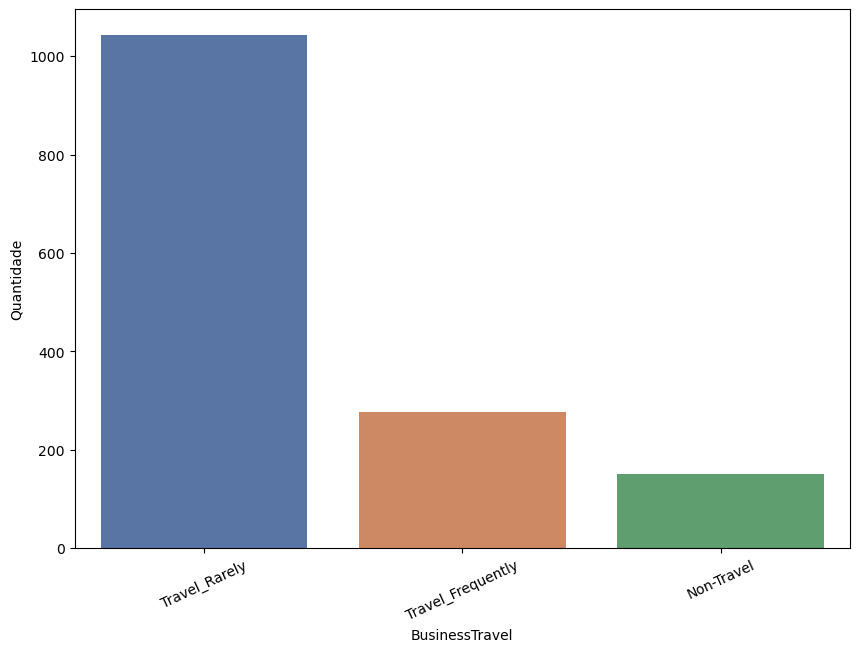

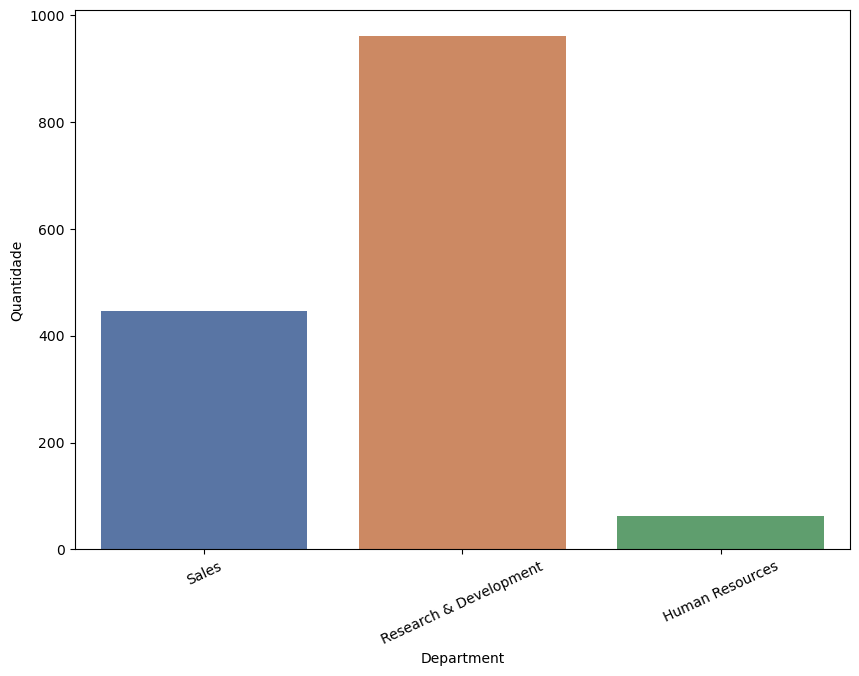

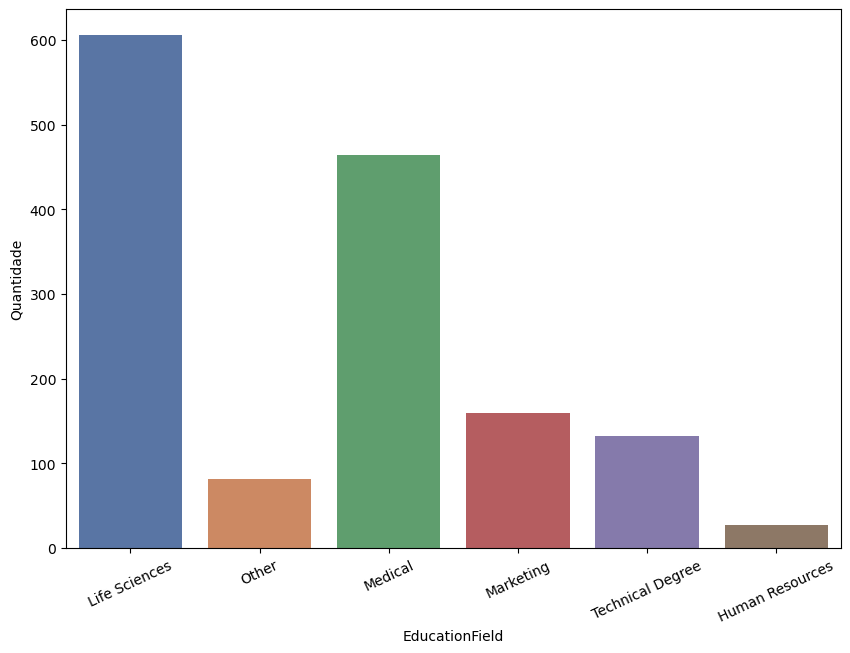

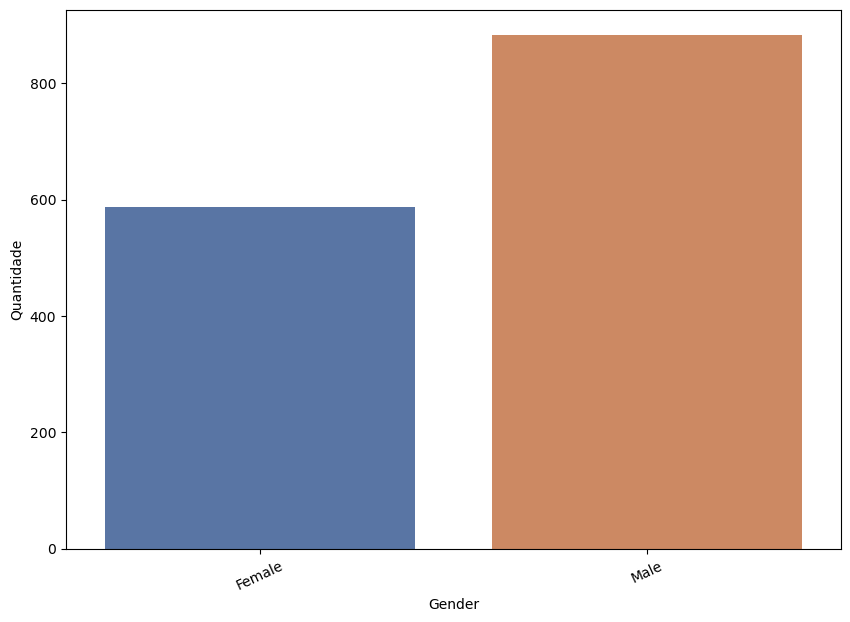

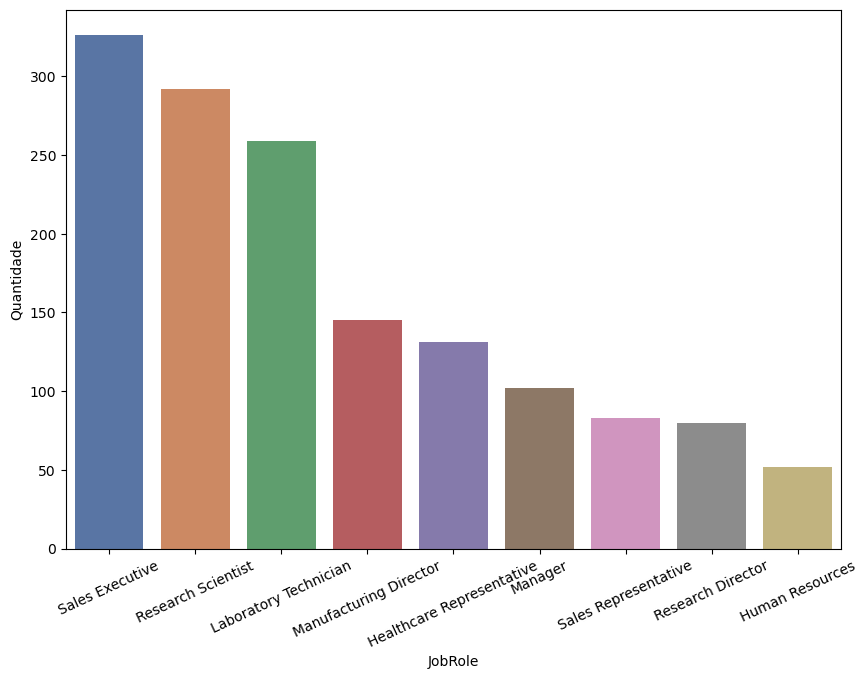

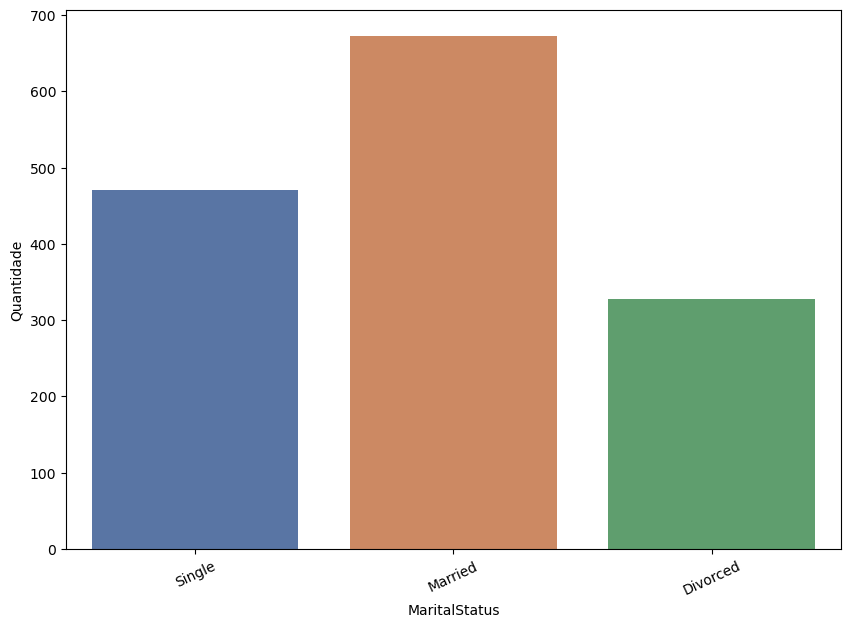

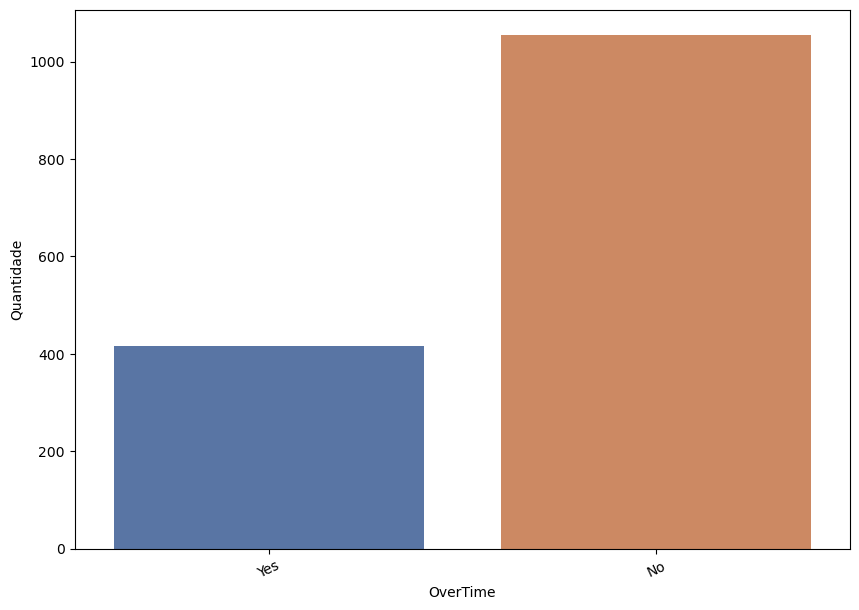

In [101]:
for categ in col_categ:
    if categ != "Over18":
        plt.figure(figsize=(10,7))
        ax = sns.countplot(data=ibm, x=categ, palette="deep")
        plt.xticks(rotation=25)
        ax.set_ylabel("Quantidade")
        plt.show()

##### **Distribuição das variáveis numéricas**

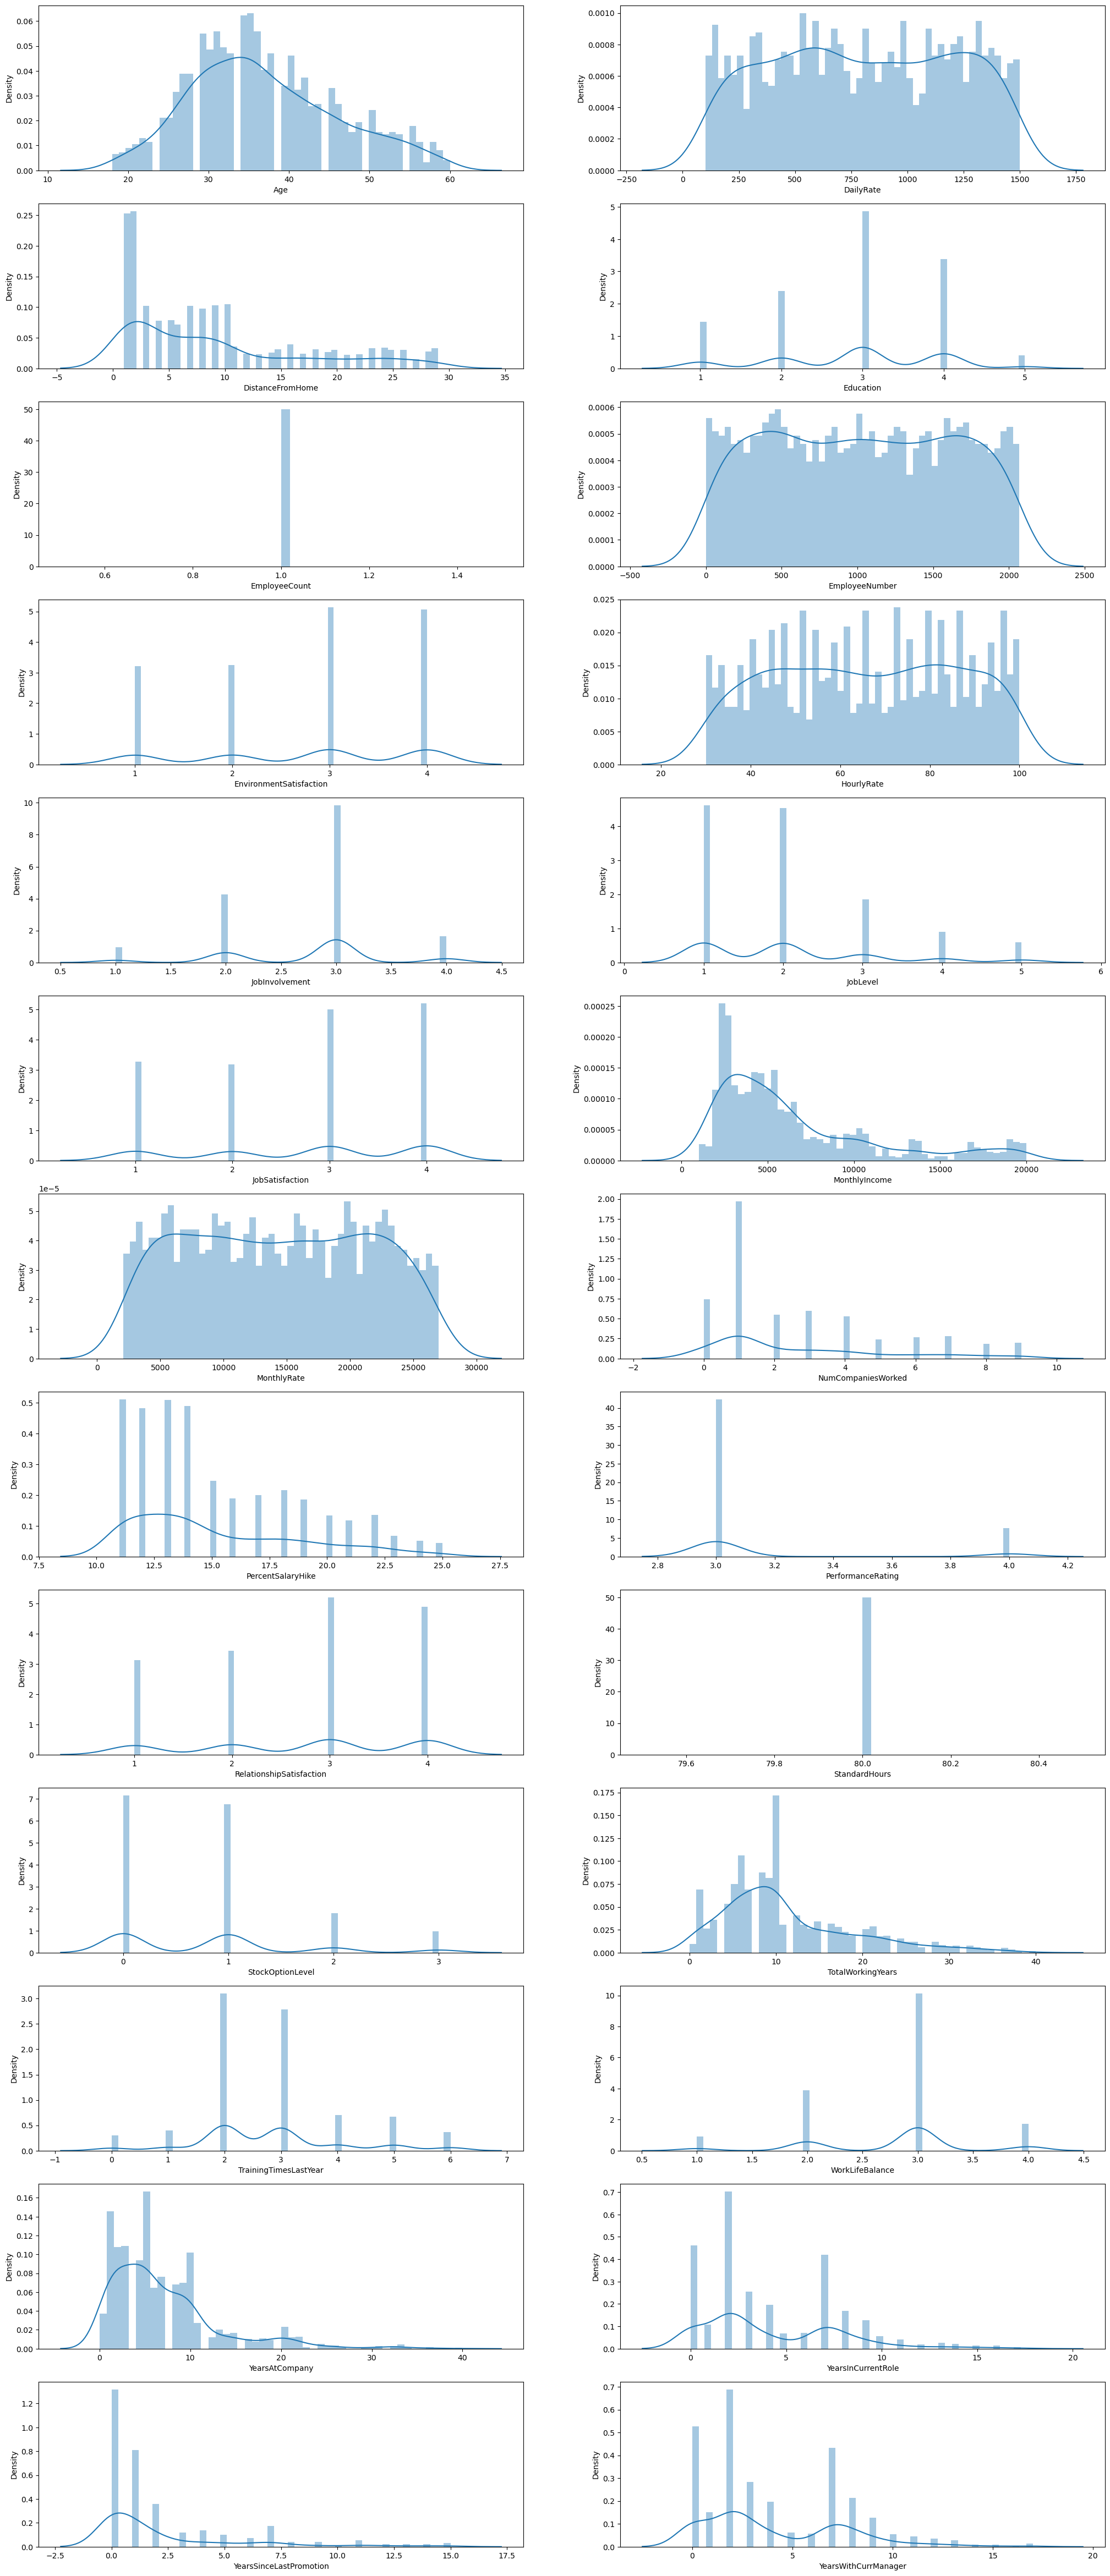

In [102]:
figs, axs = plt.subplots(nrows=13, ncols=2, figsize=(25,60))

for i, k in enumerate(col_num):
    row = i // 2
    col = i % 2
    sns.distplot(ibm[k], ax= axs[row][col], bins= 50)

Observando os histogramas podemos verificar que os dados não possuem nenhuma anormalidade na distribuição. 

##### **Respondendo as hipóteses**

**Existe alguma relação entre a idade do funcionário e sua probabilidade de evasão?**

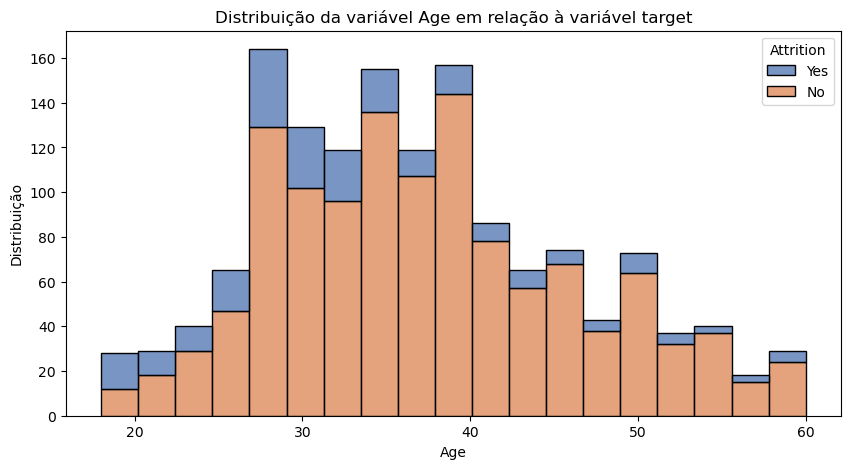

In [103]:
plt.figure(figsize=(10,5))
sns.histplot(x="Age", hue='Attrition', data=ibm, multiple='stack', palette="deep") 
plt.title(f'Distribuição da variável Age em relação à variável target') 
plt.xlabel(f'Age')
plt.ylabel('Distribuição')
plt.show()

Parece haver uma relação entre idade e evasão, apesar de não ser uma diferença muito grande funcionários a partir de 40 anos parecem ter uma evasão menor que os entre 20 ~ 30 anos.

**Funcionários da área de vendas têm maior probabilidade de evasão do que outros departamentos?**

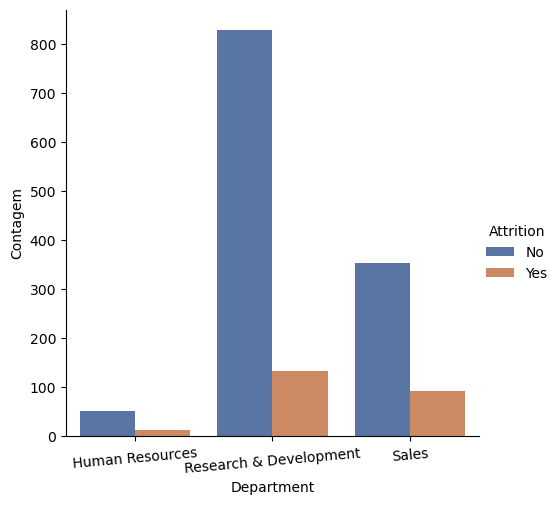

In [104]:
dept_demissoes = ibm.groupby(['Department', 'Attrition']).size().reset_index(name='Contagem')

sns.catplot(x='Department', y='Contagem', hue='Attrition', kind='bar', data=dept_demissoes, palette="deep");
plt.xticks(rotation=5);


Após pesquisar pude verificar que o setor de vendas é um dos que mais sofres pelo burnout, nos nossos dados não é diferente, como podemos observar o setor de vendas é o que tem a maior evasão proporcional.

**Funcionários que viajam com mais frequência têm maior probabilidade de evasão?**

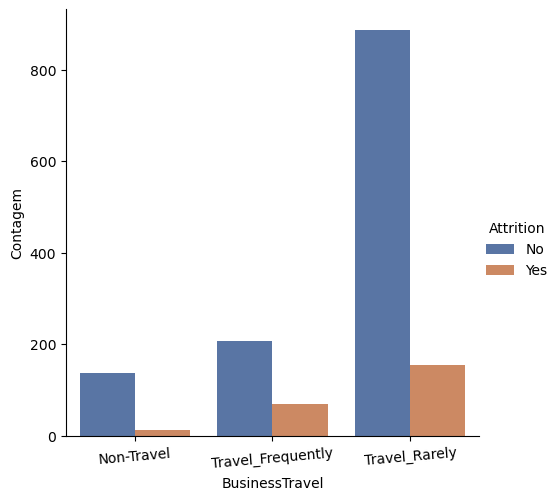

In [105]:
Travel_demissoes = ibm.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Contagem')

sns.catplot(x='BusinessTravel', y='Contagem', hue='Attrition', kind='bar', data=Travel_demissoes, palette="deep");
plt.xticks(rotation=5);

Parece ter uma relação entre funcionários que viajam frequentemente e a taxa de evasão, isso pode ocorrer devido a que funcionários que viajam constantemente as vezes não conseguem tirar um tempo para descanso, além de passa muito tempo longe de família e amigos. 

**Qual é a influência do salário na probabilidade de evasão?**

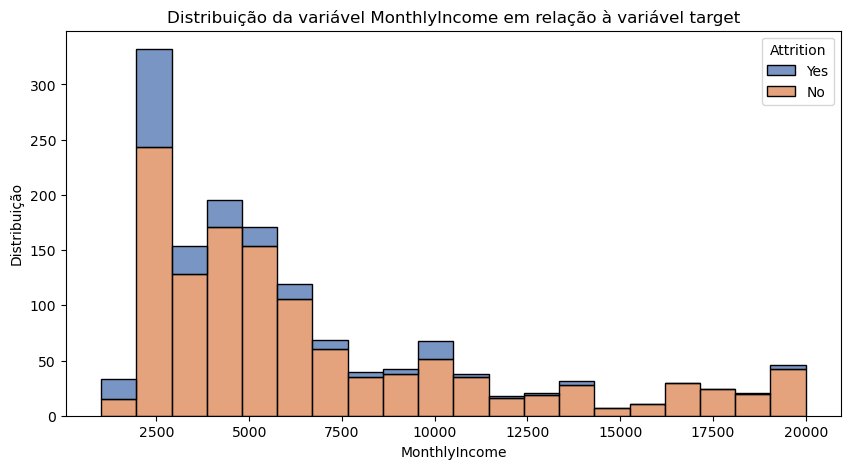

In [106]:
plt.figure(figsize=(10,5))
sns.histplot(x="MonthlyIncome", hue='Attrition', data=ibm, multiple='stack', palette="deep") 
plt.title(f'Distribuição da variável MonthlyIncome em relação à variável target') 
plt.xlabel(f'MonthlyIncome')
plt.ylabel('Distribuição')
plt.show()

Como podemos observar no gráfico acima pessoas com salário maior tem uma quantidade muito pequena de evasão já menor possui uma taxa de evasão bem alta.

**Existe alguma relação entre o nível de satisfação com o trabalho e a probabilidade de evasão?**

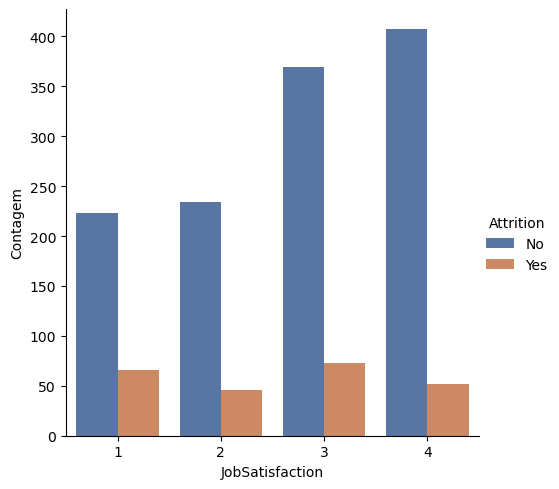

In [107]:
JobSatiscation_demissoes = ibm.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Contagem')

sns.catplot(x='JobSatisfaction', y='Contagem', hue='Attrition', kind='bar', data=JobSatiscation_demissoes, palette="deep");

Não parece ter uma relação alta entre o JobSatisfaction e a evasão, isso pode ocorrer talvez pela forma que é feita a pesquisa, alguns funcionários podem ter medo de que a sua resposta o afete negativamente. 

**Qual é a influência do tempo que um funcionário passou na empresa na probabilidade de evasão?**

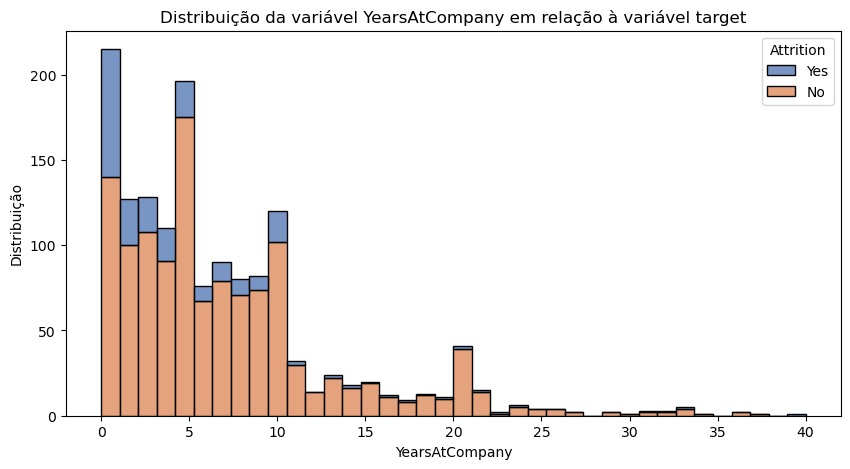

In [108]:
plt.figure(figsize=(10,5))
sns.histplot(x="YearsAtCompany", hue='Attrition', data=ibm, multiple='stack', palette="deep") 
plt.title(f'Distribuição da variável YearsAtCompany em relação à variável target') 
plt.xlabel(f'YearsAtCompany')
plt.ylabel('Distribuição')
plt.show()

Tem uma relação muito alta entre evasão e a quantidade de tempo na empresa, podemos notar um comportamento um pouco estranho na faixa dos 10 anos que foge a tendência, seria interessante observar esses casos.

**Funcionários que receberam uma promoção recentemente têm menor probabilidade de evasão?**

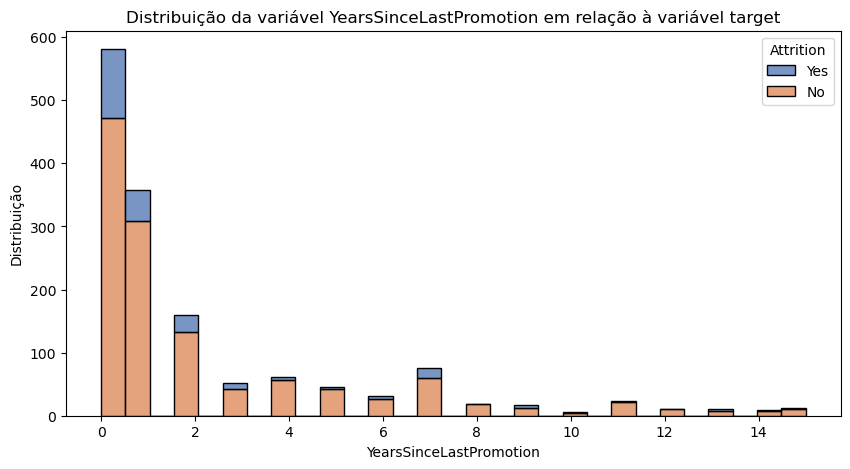

In [109]:
plt.figure(figsize=(10,5))
sns.histplot(x="YearsSinceLastPromotion", hue='Attrition', data=ibm, multiple='stack', palette="deep") 
plt.title(f'Distribuição da variável YearsSinceLastPromotion em relação à variável target') 
plt.xlabel(f'YearsSinceLastPromotion')
plt.ylabel('Distribuição')
plt.show()

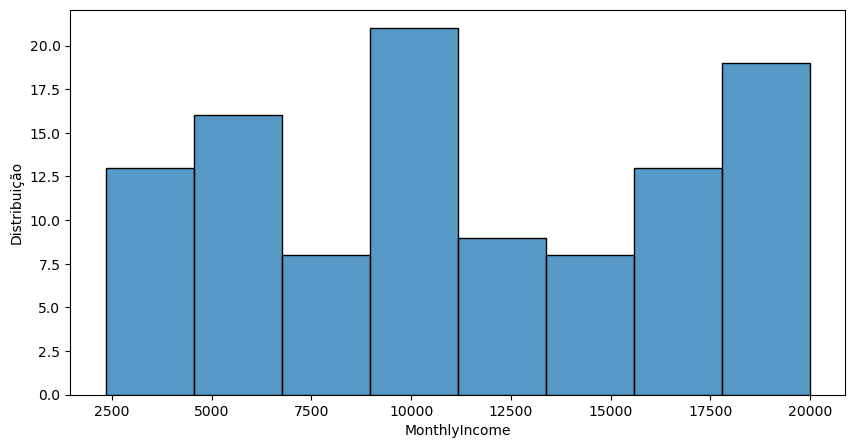

In [110]:
plt.figure(figsize=(10,5))
sns.histplot(x="MonthlyIncome", data=ibm[ibm.YearsSinceLastPromotion >= 8], multiple='stack', palette="deep") 
plt.ylabel('Distribuição')
plt.show()

Podemos notar um pico entre 0 e 1, o pico no 0 pode ocorrer porque funcionários que não tiveram nenhuma promoção também tem o valor 0 nessa coluna.
Após notar que funcionários que não recebiam promoção a 8 mais anos possui uma taxa de evasão baixíssima decidi olhar mais de perto esses casos fazendo o histograma do salário desses casos, podemos notar que em sua maioria é uma média salarial muito alta, então provavelmente essas pessoas não recebem promoção a um intervalo de período grande devido a já estarem em um nível se senioridade alto. 

#### **Pré Processamento**

In [111]:

import category_encoders as ce
from sklearn.model_selection import train_test_split

In [112]:
""" Iniciaremos fazendo a removação das colunas EmployeeCount, Over18, EmployeeNumber e StandardHours a EmployeeNumber pois todos 
os valores são únicos e as outras devido a só possuírem um valor."""

ibm.drop(columns=["EmployeeCount", "Over18", "EmployeeNumber", "StandardHours"], inplace= True)

ibm['Attrition'] = ibm['Attrition'].replace({'Yes': 1, 'No': 0})

In [113]:
X = ibm.drop("Attrition", axis=1)
y = ibm.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
"""Para o encoder das variáveis iremos utilizar o target encoder pois alguns dos modelos que desejo utilizar será baseado em árvores."""

col_num = X_train.select_dtypes(np.number).columns.to_list()

target_encoder = ce.TargetEncoder()

X_train = target_encoder.fit_transform(X_train, y_train)

X_test = target_encoder.transform(X_test)

In [115]:
""" Como um dos modelos que pretendo testar é o regressão logística e ele supõe que os dados possui uma distribuição normal irei verificar qual transformação apresenta melhor skew
para transformar os dados."""

df_log2 = np.log2(abs(X_train[col_num]) + 1)
df_l1 = abs(X_train[col_num])
df_l2 = np.sqrt(abs(X_train[col_num]))

skewness_log2 = df_log2.skew()
skewness_l1 = df_l1.skew()
skewness_l2 = df_l2.skew()

df_skew = pd.DataFrame({'Normal': X_train[col_num].skew(), 'Log2': skewness_log2.values, 'L1': skewness_l1.values, 'L2': skewness_l2.values})


In [116]:
df_skew

,Normal,Log2,L1,L2
Age,0.403126,-0.134207,0.403126,0.137246
DailyRate,-0.005694,-0.922148,-0.005694,-0.406496
DistanceFromHome,0.931019,-0.049717,0.931019,0.377903
Education,-0.273762,-0.810573,-0.273762,-0.663453
EnvironmentSatisfaction,-0.265805,-0.601644,-0.265805,-0.512969
HourlyRate,-0.088747,-0.496350,-0.088747,-0.288533
JobInvolvement,-0.503142,-1.135481,-0.503142,-0.964960
JobLevel,1.024197,0.478215,1.024197,0.615281
JobSatisfaction,-0.289601,-0.627384,-0.289601,-0.537394
MonthlyIncome,1.347580,0.331988,1.347580,0.871697


Como podemos observar acima a transformação que apresentou a melhor pontuação de skew foi o L2, sendo assim iremos transformar os dados.

In [117]:
X_train[col_num] = np.sqrt(abs(X_train[col_num]))
X_test[col_num] = np.sqrt(abs(X_test[col_num]))

#### **Modelling**

##### **Feature Select**

Feature selection é o processo de selecionar as variáveis mais importantes de um conjunto de dados para serem usadas em um modelo de machine learning. Essa seleção é realizada com o objetivo de melhorar a precisão do modelo, reduzir o tempo de treinamento e evitar overfitting.

Uma técnica comum de seleção de recursos é Recursive Feature Elimination (RFE). RFE é um algoritmo que ajusta um modelo de aprendizado de máquina em um subconjunto de recursos e avalia a importância de cada recurso. Em seguida, o recurso menos importante é removido e o processo é repetido até que um número desejado de recursos seja alcançado. A importância de cada recurso é medida pelo desempenho do modelo com e sem o recurso. Isso é feito usando um estimador externo para avaliar o desempenho do modelo. O processo de eliminação recursiva é repetido até que o número desejado de recursos seja alcançado.

In [118]:
k_score_recall = []
k_score_precision = []

for k in range(5, 30, 1):

    Selector = SelectKBest(score_func=chi2, k=k)

    xtrain2 = Selector.fit_transform(X_train, y_train)

    xtest2 = Selector.transform(X_test)

    # Como iremos lidar com dados desbalanceados irei deixar o class_weight como balanced
    rf_model = LogisticRegression(class_weight="balanced", random_state=42)
    rf_model.fit(xtrain2, y_train)

    pred_kbest = rf_model.predict(xtest2)

    recall_kbest = recall_score(y_test, pred_kbest)
    precision_kbest = precision_score(y_test, pred_kbest)

    print(f'Valor de K = {k}, Recall = {round(np.mean(recall_kbest)*100,2)}, Precision = {round(np.mean(precision_kbest)*100,2)}')

    k_score_recall.append(recall_kbest)
    k_score_precision.append(precision_kbest)

Valor de K = 5, Recall = 59.02, Precision = 21.43
Valor de K = 6, Recall = 57.38, Precision = 21.08
Valor de K = 7, Recall = 55.74, Precision = 20.73
Valor de K = 8, Recall = 62.3, Precision = 24.52
Valor de K = 9, Recall = 62.3, Precision = 25.0
Valor de K = 10, Recall = 62.3, Precision = 25.0
Valor de K = 11, Recall = 60.66, Precision = 25.69
Valor de K = 12, Recall = 63.93, Precision = 26.71
Valor de K = 13, Recall = 65.57, Precision = 26.67
Valor de K = 14, Recall = 62.3, Precision = 26.57
Valor de K = 15, Recall = 59.02, Precision = 23.53
Valor de K = 16, Recall = 65.57, Precision = 27.97
Valor de K = 17, Recall = 59.02, Precision = 24.83
Valor de K = 18, Recall = 60.66, Precision = 27.21
Valor de K = 19, Recall = 67.21, Precision = 29.08
Valor de K = 20, Recall = 57.38, Precision = 24.48
Valor de K = 21, Recall = 63.93, Precision = 28.26
Valor de K = 22, Recall = 62.3, Precision = 28.57
Valor de K = 23, Recall = 65.57, Precision = 29.63
Valor de K = 24, Recall = 60.66, Precision 

O valor K = 19 apresentou um resultado bem satisfatório pois teve um valor bom de recall e o precision não ficou tão baixo, optaremos por esse K.

In [119]:
Selector = SelectKBest(score_func=chi2, k=19)
Selector.fit_transform(X_train, y_train)

Features_KBest = list(X_train.iloc[:,Selector.get_support()])

In [120]:
""" Filtrando somente as colunas selecionadas pelo SelectKBest """

X_train, X_test = X_train[Features_KBest], X_test[Features_KBest]
X = X[Features_KBest]

##### **Informações sobre o modelling**

**Bayesian Optimization (Tunning de Hiperparâmetro)**

Para a parte do tunning do hiperparâmetro irei escolher a minha técnica preferida, a otimização bayesiana ou bayesian optimization.

***Como funciona:***

A Otimização Bayesiana usa uma abordagem iterativa para ajustar os hiperparâmetros. A cada iteração, ela usa a informação dos resultados anteriores para atualizar a função objetivo e selecionar um novo conjunto de hiperparâmetros para testar.

 **Cross Validation**

O cross validation serve para avaliar o desempenho de um modelo de machine learning, permitindo que ele seja testado em diferentes conjuntos de dados e evitando o overfitting.

***Como funciona:***

O cross validation é uma técnica que divide o conjunto de dados em várias partes, chamadas de folds. Em cada iteração, um dos folds é usado como conjunto de teste, enquanto os demais são usados como conjunto de treinamento. O processo é repetido várias vezes, com diferentes combinações de folds, e o desempenho do modelo é calculado como a média dos resultados obtidos em cada iteração. Essa técnica ajuda a evitar o overfitting e a avaliar o desempenho do modelo de forma mais confiável.

##### **Logistic Regression**

In [121]:
def treinar_modelo(params):
    C = params[0]
    max_iter = params[1]
    solver = params[2]

    print(params, '\n')
    

    mdl = LogisticRegression(class_weight='balanced',
                             C=C, 
                             max_iter=max_iter,
                             penalty='l2',
                             solver = solver,
                             random_state=42)

    mdl.fit(X_train, y_train)

    p = mdl.predict(X_test)

    return -recall_score(y_test, p)


space = [(0.001, 1.0), # C
         (200, 1000), # max_iter
         ('sag', 'lbfgs')] # solver
Bay_LR = gp_minimize(treinar_modelo, space, n_calls=30, random_state=42, verbose = 0)

[0.7967464438733728, 347, 'sag'] 

[0.5972533077885406, 557, 'lbfgs'] 

[0.4597896430739014, 467, 'lbfgs'] 

[0.6512375844759042, 245, 'sag'] 

[0.9386141563067346, 201, 'sag'] 

[0.6178640281180889, 689, 'lbfgs'] 

[0.024039362616374346, 620, 'lbfgs'] 

[0.04761899755040182, 979, 'lbfgs'] 

[0.091515828098288, 695, 'lbfgs'] 

[0.9832476549209817, 573, 'sag'] 

[1.0, 200, 'lbfgs'] 

[1.0, 1000, 'lbfgs'] 

[1.0, 1000, 'lbfgs'] 

[1.0, 200, 'lbfgs'] 

[0.001, 237, 'lbfgs'] 

[0.4922293739059504, 1000, 'lbfgs'] 

[0.6827380362199675, 859, 'lbfgs'] 

[1.0, 772, 'lbfgs'] 

[0.04139138685456968, 465, 'lbfgs'] 

[1.0, 1000, 'lbfgs'] 

[0.8646922885361489, 835, 'lbfgs'] 

[0.6065988633589732, 388, 'lbfgs'] 

[0.001, 1000, 'sag'] 

[0.796573541905441, 727, 'lbfgs'] 

[1.0, 1000, 'sag'] 

[0.5251150230067899, 200, 'lbfgs'] 

[0.38855434716025344, 200, 'lbfgs'] 

[0.001, 200, 'sag'] 

[1.0, 497, 'lbfgs'] 

[0.48515117019724063, 1000, 'sag'] 



In [122]:
print('Os parâmetros escolhidos pelo Bayesian Optimization foram:')
print()
print('C =',Bay_LR.x[0])
print('max_iter =',Bay_LR.x[1])
print('solver =',Bay_LR.x[2])

Os parâmetros escolhidos pelo Bayesian Optimization foram:

C = 0.38855434716025344
max_iter = 200
solver = lbfgs


In [123]:
Result_LR_Recall = []
Result_LR_Precision = []
Model_LR = LogisticRegression(C = Bay_LR.x[0],
                           max_iter = Bay_LR.x[1],
                           class_weight='balanced',
                           penalty = 'l2',
                           solver=Bay_LR.x[2], random_state=42)

In [124]:
cv_classi(Model_LR, X_train, y_train, Result_LR_Recall, Result_LR_Precision)

Repetição:  0
Treino 771
Valid 258
Repetição: 0


NameError: name 'recall_score' is not defined

In [ ]:
print(f'O modelo de regressão logística apresentou o recall médio de {round(np.mean(Result_LR_Recall)*100,2)}% e o Precision médio de {round(np.mean(Result_LR_Precision)*100,2)}  na base de treino')